# Bifurcations and Hysteresis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [2]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7,maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

In [3]:
def F(x, lmbda):
    return lmbda*x - (x**3)

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(5, 0, 200), np.sqrt(5), F)
# Top bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, 0, 200), -np.sqrt(5), F)

# Middle curve in bifurcation diagram
C0l, X0l = EmbeddingAlg(np.linspace(-5, 0, 200), 0, F)
C0r, X0r = EmbeddingAlg(np.linspace(5,  0, 200), 0, F)

## Problem 1
Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

$ \dot{x} = \lambda x - x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram).
Hints: Essentially this amounts to running the same code as the example, but with different parameters and function calls so that you are tracing through the right curves for this
problem. To make this first problem work, you will want to have your `linspace' run from
high to low instead of from low to high. There will be three different lines in this image. See figure 4.3.

In [4]:
plt.plot(C1, X1, label = "$ \overline{x}=\sqrt{-\lambda}$")
plt.plot(C2, X2, label = "$ \overline{x}=\sqrt{\lambda}$")
plt.plot(C0l, X0l, 'g', label = "$ \overline{x}=0$ (stable)")
plt.plot(C0r, X0r, 'g--', label = "$ \overline{x}=0$ (unstable)")
plt.legend()
plt.title("Bifurcation diagram for $ \dot{x} = \lambda x - x^3$")
plt.xlabel("$\lambda$")
plt.ylabel("x")
plt.show()

## Problem 2
Create bifurcation diagrams for the differential equation

$ \dot{x} =\eta + \lambda x - x^3$

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. There should be four different images, one for each value of η. Each
image will be built of 3 pieces. See Figure 4.4.

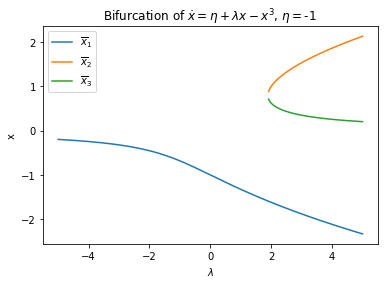

Bifurcation happens near  1.912562814070352


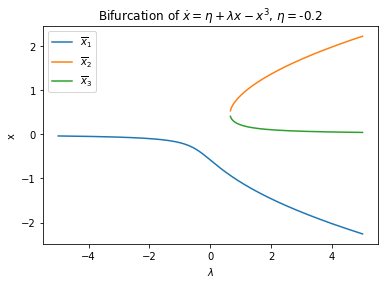

Bifurcation happens near  0.658291457286432


Bifurcation happens near  0.658291457286432


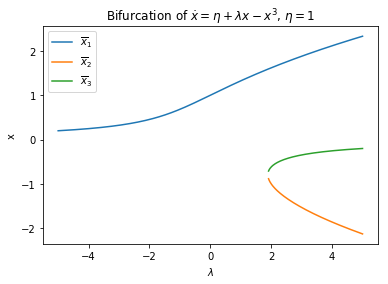

Bifurcation happens near  1.912562814070352


In [5]:
F = lambda eta : lambda x,lmbda : eta + lmbda * x - x**3

etas = [-1, -.2, .2, 1]

# Found through a little trial-and-error
guesses = [[0,2,0],[0,2,0],[0,-2,0],[0,-2,0]]

for eta, guess in zip(etas, guesses):
    myF = F(eta)
    # Full x ~ 0 curve 
    C0, X0 = EmbeddingAlg(np.linspace(-5,5,200), guess[0], myF)
    
    # Top x = lambda curve shown in the bifurcation diagram
    C1, X1 = EmbeddingAlg(np.linspace(5, .2, 200), guess[1], myF)
    # Bottom x = lambda curve
    C2, X2 = EmbeddingAlg(np.linspace(5, .2, 200), guess[2], myF)
    
    plt.plot(C0, X0, label = "$ \overline{x}_1$")
    plt.plot(C1, X1, label = "$ \overline{x}_2$")
    plt.plot(C2, X2, label = "$ \overline{x}_3$")
    plt.legend()
    plt.xlabel("$\lambda$")
    plt.ylabel("x")
    plt.title("Bifurcation of $ \dot{x} =\eta + \lambda x - x^3$, $\eta =$" + str(eta))
    plt.show()
    
    print("Bifurcation happens near ", C2[-1])


## Problem 3

Reproduce the bifurcation diagram for the differential equation

$\frac{dx}{d\tau} = rx(1-x/k)-\frac{x^2}{1+x^2}$

where r = 0.56.
Hint: Find a value for k that you know is in the middle of the plot (i.e. where there are
three possible solutions), then use the code above to expand along each contour till you obtain
the desired curve. Now find the proper initial guesses that give you the right bifurcation curve.
The final plot will look like the one in Figure 4.7, but you will have to run the embedding
algorithm 4-6 times to get every part of the plot.

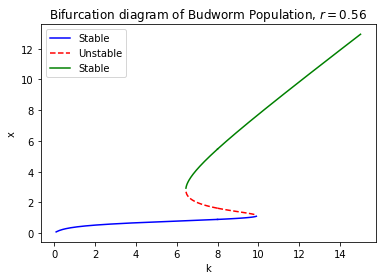

In [6]:
r = 0.56
F = lambda x, k : r * x *(1-x/k) - x**2/(1+x**2)

# Get the bottom-most line
C_bot_l,X_bot_l = EmbeddingAlg(np.linspace(8,.1,200), 1, F)
C_bot_r,X_bot_r = EmbeddingAlg(np.linspace(8,15,200), 1, F)

# Get the middle (unstable) line
C_mid_l,X_mid_l = EmbeddingAlg(np.linspace(8,.1,200), 2, F)
C_mid_r,X_mid_r = EmbeddingAlg(np.linspace(8,15,200), 2, F)

# Get the upper line
C_upper_l,X_upper_l = EmbeddingAlg(np.linspace(8,6,200), 5, F)
C_upper_r,X_upper_r = EmbeddingAlg(np.linspace(8,15,200), 5, F)


plt.plot(C_bot_l,X_bot_l,'b')
plt.plot(C_bot_r,X_bot_r,'b',label='_nolegend_')
plt.plot(C_mid_l,X_mid_l,'r--')
plt.plot(C_mid_r,X_mid_r,'r--',label='_nolegend_')
plt.plot(C_upper_l,X_upper_l,'g')
plt.plot(C_upper_r,X_upper_r,'g',label='_nolegend_')
plt.legend(["Stable","Unstable","Stable"])
plt.title("Bifurcation diagram of Budworm Population, $r = 0.56$")
plt.xlabel("k")
plt.ylabel("x")
plt.show()